<a href="https://colab.research.google.com/github/AbdulHamid13/twitter-sentiment-analysis/blob/main/PBA_Tugas_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import revelant libraries
import pandas as pd
import numpy as np
import nltk
import string
import plotly.express as px
import re
#Downloading revelant content
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# Tensorflow (Model)
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/PBA_Tugas4"

/content/drive/MyDrive/Colab Notebooks/PBA_Tugas4


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  twitter_training.csv.zip
  inflating: twitter_training.csv    


In [ ]:
# Load Tweet dataset
#uploaded = files.upload()

#df = pd.read_csv(io.StringIO(uploaded['twitter.csv'].decode('utf-8')))
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PBA_Tugas4/twitter_training.csv')
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
# Renaming Columns name 
colnames=['TweetId', 'Entity', 'Output', 'Tweet']

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PBA_Tugas4/twitter_training.csv', names=colnames, header=None)

In [ ]:
df = data[["Entity","Output","Tweet"]]
df

,Entity,Output,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
df= df.drop_duplicates()
df

,Entity,Output,Tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


In [ ]:
import re
import string   
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


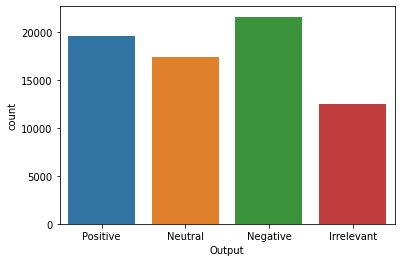

In [ ]:
sns.countplot(x="Output",data=df)

In [ ]:
sentiment = []

for i in df["Output"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["sentiment"] = sentiment
df

,Entity,Output,Tweet,sentiment
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,1
1,Borderlands,Positive,I am coming to the borders and I will kill you...,1
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,1
3,Borderlands,Positive,im coming on borderlands and i will murder you...,1
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1
...,...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...,1
74678,Nvidia,Positive,Just realized that my Mac window partition is ...,1
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...,1
74680,Nvidia,Positive,Just realized between the windows partition of...,1


In [ ]:
df.sentiment.value_counts()

 0    29888
-1    21596
 1    19577
Name: sentiment, dtype: int64

In [ ]:
plot=df.sentiment.value_counts()
px.bar(plot,color=plot.index,color_continuous_scale=px.colors.sequential.Cividis)

In [ ]:
s1=df[df.sentiment==1].sample(70, replace=True)
s2=df[df.sentiment==-1].sample(30, replace=True)

df=pd.concat([s1,s2])
print(df.shape)
print(df.sentiment.value_counts(normalize=True))

(100, 4)
 1    0.7
-1    0.3
Name: sentiment, dtype: float64


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

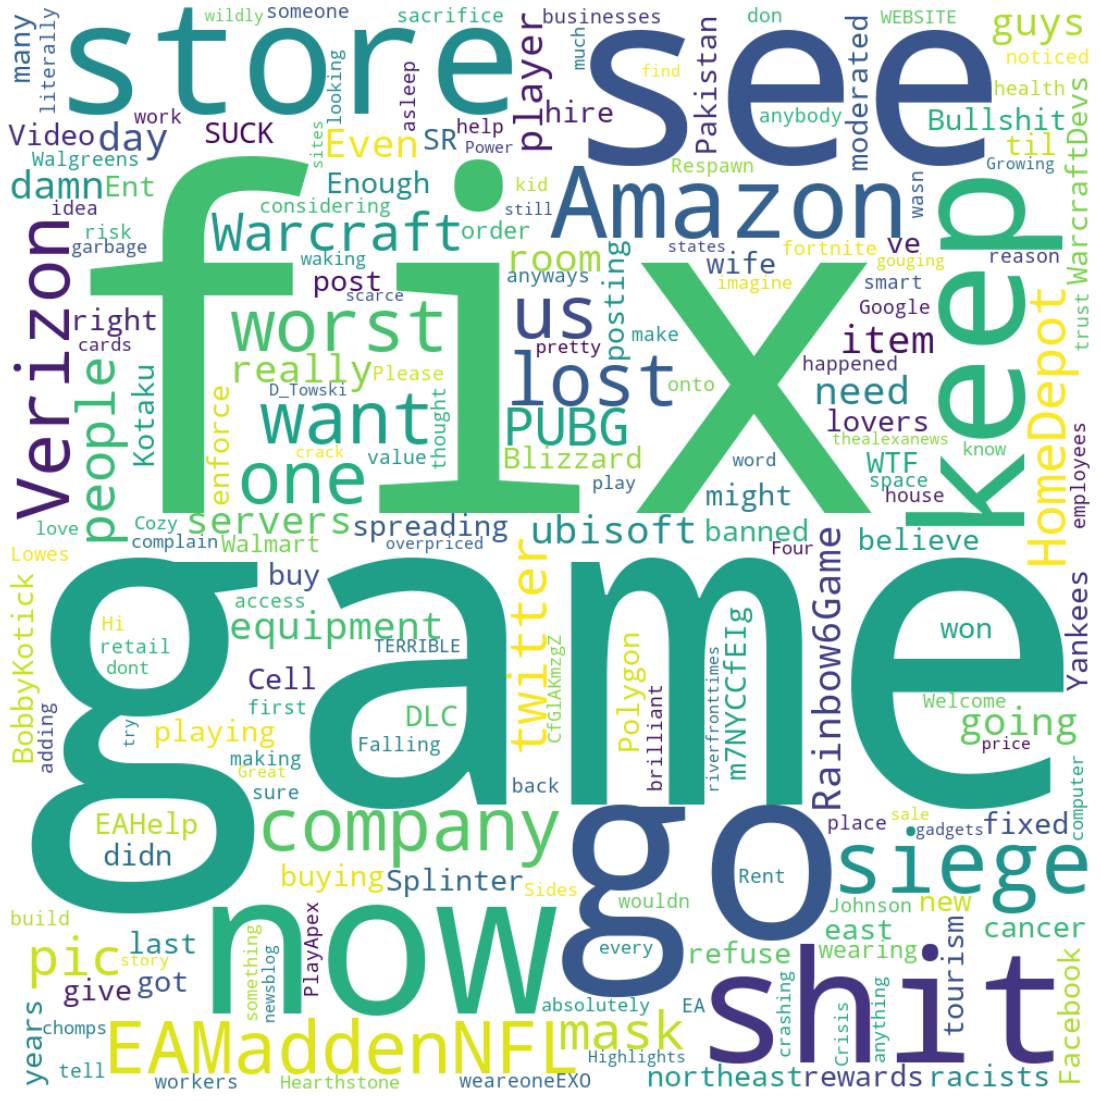

In [ ]:
#polarity = -1
trains1=df[df['sentiment']==-1]
all_text=' '.join([str(word) for word in trains1['Tweet']])
word_cloud=WordCloud(width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

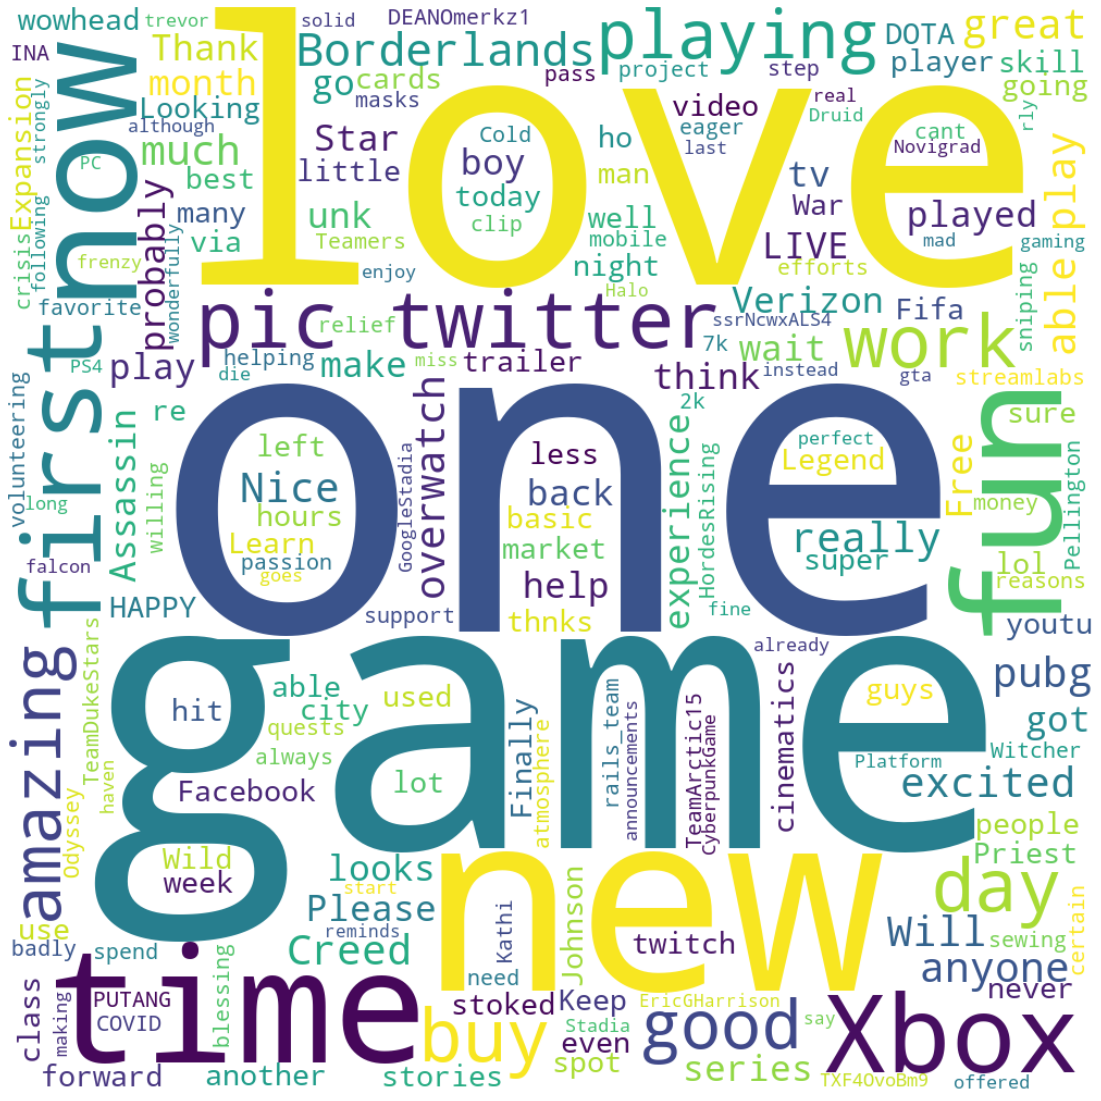

In [ ]:
#polarity = 1
trains1=df[df['sentiment']==1]
all_text=' '.join([str(word) for word in trains1['Tweet']])
word_cloud=WordCloud(width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
#preprocessing

import string, re

def cleansing(df):
    #lowertext
    df=df.lower()
    
    #Remove Punctuation
    remove=string.punctuation
    translator=str.maketrans(remove,' '*len(remove))
    df=df.translate(translator)
    
    #Remove ASCII & UNICODE
    df=df.encode('ascii','ignore').decode('utf-8')
    df=re.sub(r'[^\x00-\x7f]',r'', df)
    
    #Remove Newline
    df=df.replace('\n',' ')
    
    return df

In [ ]:
df

,Entity,Output,Tweet,sentiment
37310,Microsoft,Positive,A great day in the markets.,1
28331,ApexLegends,Positive,<unk> Boy's In The Stars streamlabs.com/DEANOm...,1
45432,Verizon,Positive,V Teamers are always willing to step up in a c...,1
69325,Cyberpunk2077,Positive,I support this:),1
50976,FIFA,Positive,Will anyone buy me a star pass in Fifa mobile....,1
...,...,...,...,...
52254,RedDeadRedemption(RDR),Negative,Absolute king shit,-1
58215,TomClancysRainbowSix,Negative,what the fuck is going around with the damn ub...,-1
39640,Battlefield,Negative,"In multiplayer mode, I can't see even any one ...",-1
62968,GrandTheftAuto(GTA),Negative,There is no escape now from this cursed land. ...,-1


In [ ]:
review = []
for index, row  in df.iterrows():
    review.append(cleansing(str(row['Tweet'])))

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.6 MB/s 


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

review = []
for index, row in df.iterrows():
    review.append(stopword.remove(str(row['Tweet'])))


df['preprocess']=review
df.head()

,Entity,Output,Tweet,sentiment,preprocess
37310,Microsoft,Positive,A great day in the markets.,1,A great day in the markets.
28331,ApexLegends,Positive,<unk> Boy's In The Stars streamlabs.com/DEANOm...,1,<unk> Boy's In The Stars streamlabs.com/DEANOm...
45432,Verizon,Positive,V Teamers are always willing to step up in a c...,1,V Teamers are always willing to step up in a c...
69325,Cyberpunk2077,Positive,I support this:),1,I support this:)
50976,FIFA,Positive,Will anyone buy me a star pass in Fifa mobile....,1,Will anyone buy me a star pass in Fifa mobile....


In [ ]:
#Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

from tqdm import tqdm
review = []
for index, row in tqdm(df.iterrows()):
    review.append(stemmer.stem(row["Tweet"]))
    
df['preprocess']=review
df.head()

100it [01:54,  1.14s/it]


,Entity,Output,Tweet,sentiment,preprocess
37310,Microsoft,Positive,A great day in the markets.,1,a great day in the markets
28331,ApexLegends,Positive,<unk> Boy's In The Stars streamlabs.com/DEANOm...,1,unk boy s in the stars streamlabs com deanomer...
45432,Verizon,Positive,V Teamers are always willing to step up in a c...,1,v teamers are always willing to step up in a c...
69325,Cyberpunk2077,Positive,I support this:),1,i support this
50976,FIFA,Positive,Will anyone buy me a star pass in Fifa mobile....,1,will anyone buy me a star pass in fifa mobile ...


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['preprocess'], df['sentiment'], train_size = 0.8)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# untuk implementasi pada dokumen
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(80, 724)
(20, 724)


In [ ]:
from sklearn.model_selection import cross_val_score
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

f1 hasil prediksi yaitu: 
0.6666666666666666
accuracy hasil prediksi yaitu: 
0.55
precision hasil prediksi yaitu: 
0.6923076923076923
recall hasil prediksi yaitu: 
0.6428571428571429


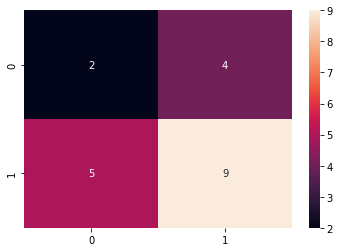

In [ ]:
from sklearn import naive_bayes

clf = naive_bayes.GaussianNB()

#Fitting
clf.fit(X_train.toarray(), y_train)
predict = clf.predict(X_test.toarray())

# f1_score
print("f1 hasil prediksi yaitu: ")
print(f1_score(y_test, predict))

# accuracy score
print("accuracy hasil prediksi yaitu: ")
print(accuracy_score(y_test, predict))

# precision score
print("precision hasil prediksi yaitu: ")
print(precision_score(y_test, predict))

# recall score
print("recall hasil prediksi yaitu: ")
print(recall_score(y_test, predict))

import seaborn as sns
_=sns.heatmap(confusion_matrix(y_test, predict), annot=True,fmt='g')